In [1]:
import numpy as np
import hough_module
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage.data import checkerboard
from skimage.transform import (hough_line,
                               hough_line_peaks,
                               probabilistic_hough_line)

# check extern/hough_module.c
from hough_module import hough_line as hough_line_extern

# Hough Transform

The **Hough transform** is a feature extraction technique used in image
analysis, computer vision, and digital image processing using voting technique.

A **parametric model** can represent a class of instances where each is
defined by a valuse of the parameters.
- e.g. lines, circles or a parameterized template.

**Voting** is a general technique where we let the features vote for all
models that are compatible with it.
**Voting** works because:
- Noise features will cast votes too, but typically their votes should be inconsistent with the majority of "good" features.

---

## Fitting lines
To fit lines we need to answer:
- Given points that belong to a line. what is the line?
- How many lines are there?
- Which points belong to which lines?

$y= mx + b$ representation of line is a problem because for $90\circ$ line m goes to infinite.
We can use **polar representation** of line as a work around for this problem.
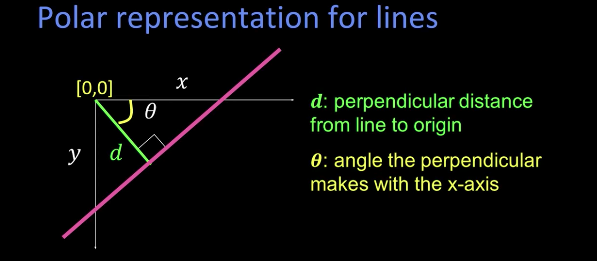

So the formula is:
$$x\cos\theta + y\sin\theta=d$$

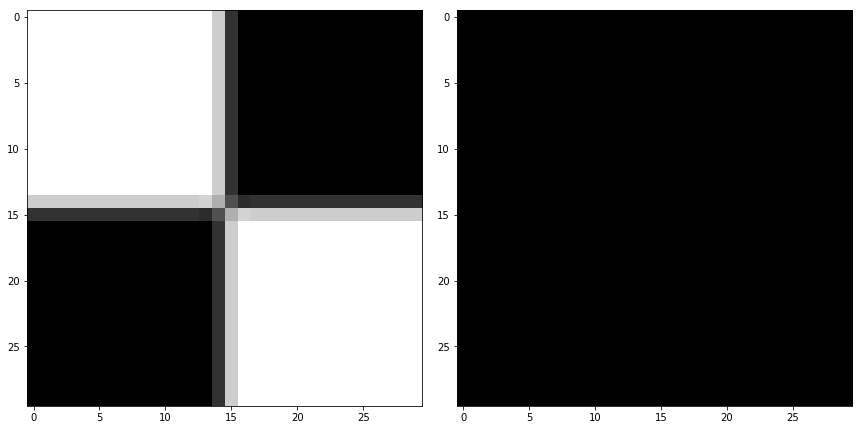

In [2]:
checker = rgb2gray(checkerboard())[10:40,10:40]

fig = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(131)
ax1.imshow(checker, plt.cm.gray)

out_arr = np.zeros(checker.shape)
hough_line_extern(checker, out_arr)

ax2 = plt.subplot(132)
ax2.imshow(out_arr, plt.cm.gray)

plt.tight_layout()
plt.show()

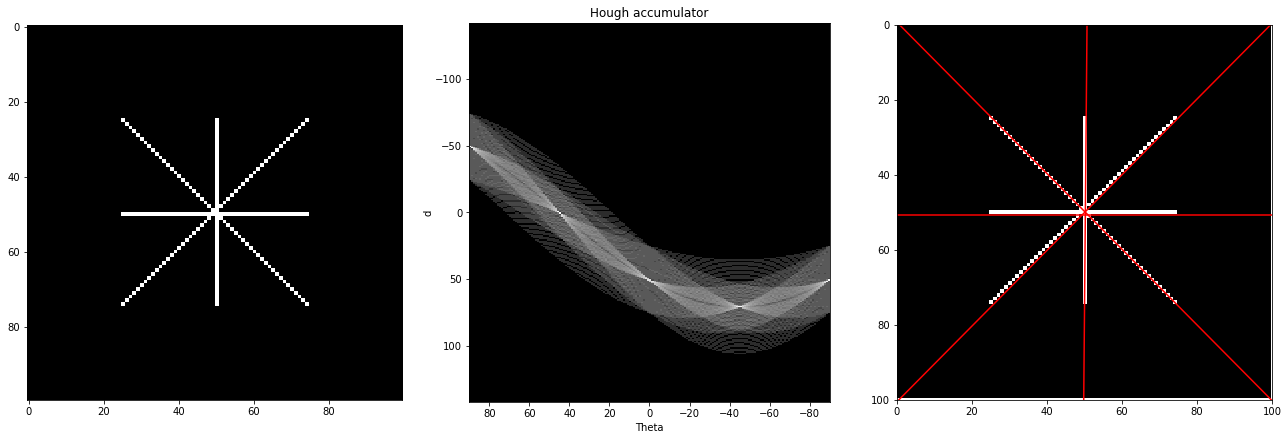

In [3]:
fig = plt.figure(figsize=(18, 6))

# input image (cross)
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255
image[idx, 50] = 255
image[50, idx] = 255

ax1 = plt.subplot(131)
ax1.imshow(image, plt.cm.gray)

# calculate hough lines
h, theta, d = hough_line(image)
ax2 = plt.subplot(132)
ax2.set_title('Hough accumulator')
ax2.set_xlabel('Theta')
ax2.set_ylabel('d', labelpad=1)
ax2.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=plt.cm.gray, aspect=1/1.5)

ax3 = plt.subplot(133)
ax3.imshow(image, cmap=plt.cm.gray)

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax3.plot((0, image.shape[1]), (y0, y1), '-r')

ax3.set_xlim((0, image.shape[1]))
ax3.set_ylim((image.shape[0], 0))

plt.tight_layout()
plt.show()